<h1>Svojstva grafova u SAGE-u</h1>
<p>U ovom dijelu ćemo proći kroz neke naredbe koje ispituju razna svojstva grafa. Paralelno ćemo koristiti uz SAGE naredbe i networkx modul.</p>

In [1]:
import sage.misc.banner
banner()

┌────────────────────────────────────────────────────────────────────┐
│ SageMath version 9.2, Release Date: 2020-10-24                     │
│ Using Python 3.8.6. Type "help()" for help.                        │
└────────────────────────────────────────────────────────────────────┘


In [2]:
from IPython.core.display import Image

In [3]:
G1=Graph({1:[2,3,4],2:[4,5],3:[4,5,6],4:[5],5:[6]})
G2=Graph({1:[2,3],2:[3],3:[4],4:[5,5],5:[6]})
G3=Graph({1:[2,6],2:[3,7,8],3:[4],4:[5],5:[6,7,8]})

<p>Tri grafa na kojima ćemo vršiti ispitivanja</p>

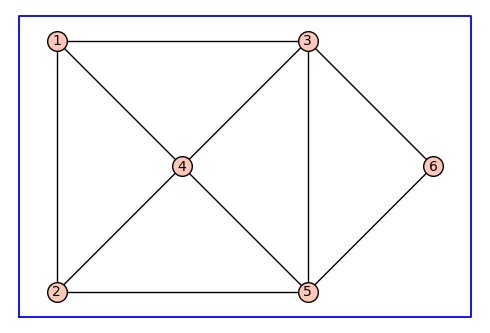

In [4]:
G1.plot(pos={1:[0,2],2:[0,0],3:[2,2],4:[1,1],5:[2,0],6:[3,1]},graph_border=True,figsize=[5,4])

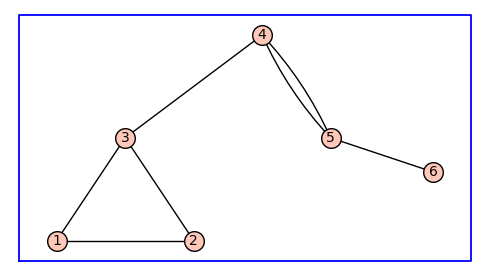

In [5]:
G2.plot(pos={1:[0,0],2:[2,0],3:[1,1.5],4:[3,3],5:[4,1.5],6:[5.5,1]},graph_border=True,figsize=[5,4])

In [6]:
G3.plot(pos={1:[0,2],2:[1,2],3:[2,2],4:[2,0],5:[1,0],6:[0,0],7:[-1,1],8:[3,1]},graph_border=True,figsize=[5,4])

<p><strong>Kako bismo te grafove mogli kreirati s networkx modulom</strong></p>

In [7]:
import networkx as nx
from pylab import *

<p>Tri načina spremanja grafova u datoteku. Klikom na linkove ih možemo spremiti na disk, a kasnije opet te datoteke uploadati u SAGE i normalno ih koristiti.</p>

In [8]:
P=nx.petersen_graph()

In [9]:
nx.write_adjlist(P,"petersen.adjlist")

In [10]:
nx.write_edgelist(P,"petersen.edgelist")

In [11]:
nx.write_multiline_adjlist(P,"petersen.multiadjlist")

<p><strong>Učitavanje grafa iz vanjske datoteke</strong></p>

In [12]:
G1nx=nx.read_adjlist("graf1_adjlist.sage",nodetype=int)

In [13]:
G1nx.nodes()

NodeView((1, 2, 3, 4, 5, 6))

In [14]:
G1nx.edges()

EdgeView([(1, 2), (1, 3), (1, 4), (2, 4), (2, 5), (3, 4), (3, 5), (3, 6), (4, 5), (5, 6)])

In [15]:
dat1=open("graf1_adjlist.sage",'r')
podaci1=dat1.read()
dat1.close()

In [16]:
podaci1

'#graf1\n1 2 3 4\n2 4 5\n3 4 5 6\n4 5\n5 6\n6'

In [17]:
print(podaci1)

#graf1
1 2 3 4
2 4 5
3 4 5 6
4 5
5 6
6


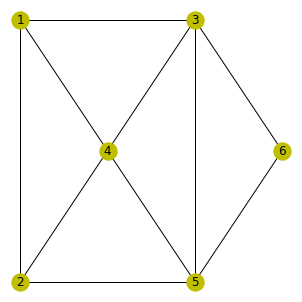

In [18]:
figure(figsize=(4,4))
nx.draw(G1nx,pos={1:[0,2],2:[0,0],3:[2,2],4:[1,1],5:[2,0],6:[3,1]},with_labels=True,node_color='y')

In [19]:
G2nx=nx.read_adjlist("graf2_adjlist.sage",create_using=nx.MultiGraph(),nodetype=int)

In [20]:
G2nx.nodes()

NodeView((1, 2, 3, 4, 5, 6))

In [21]:
G2nx.edges()

MultiEdgeDataView([(1, 2), (1, 3), (2, 3), (3, 4), (4, 5), (4, 5), (5, 6)])

In [22]:
dat2=open("graf2_adjlist.sage",'r')
podaci2=dat2.read()
dat2.close()

In [23]:
podaci2

'#graf2\n1 2 3\n2 3\n3 4\n4 5 5\n5 6\n6'

In [24]:
print(podaci2)

#graf2
1 2 3
2 3
3 4
4 5 5
5 6
6


In [25]:
G2sage=Graph(Matrix(nx.to_numpy_matrix(G2nx,dtype=int)))
s2=G2sage.graphviz_string()
os.system("echo '%s' | dot -Kcirco -Tpng > graf2.png" % s2)

0

In [26]:
Image(filename="graf2.png")

In [27]:
G3nx=nx.read_adjlist("graf3_adjlist.sage",nodetype=int)

In [28]:
G3nx.nodes()

NodeView((1, 2, 6, 3, 7, 8, 4, 5))

In [29]:
G3nx.edges()

EdgeView([(1, 2), (1, 6), (2, 3), (2, 7), (2, 8), (6, 5), (3, 4), (7, 5), (8, 5), (4, 5)])

In [30]:
dat3=open("graf3_adjlist.sage",'r')
podaci3=dat3.read()
dat3.close()

In [31]:
podaci3

'#graf3\n1 2 6\n2 3 7 8\n3 4\n4 5\n5 6 7 8\n6\n7\n8'

In [32]:
print(podaci3)

#graf3
1 2 6
2 3 7 8
3 4
4 5
5 6 7 8
6
7
8


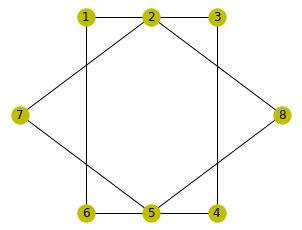

In [33]:
figure(figsize=(4,3))
nx.draw(G3nx,pos={1:[0,2],2:[1,2],3:[2,2],4:[2,0],5:[1,0],6:[0,0],7:[-1,1],8:[3,1]},with_labels=True,node_color='y')

<h2>Svojstva grafova</h2>

<h4>Je li graf prazan?</h4>

<p>Promatrani grafovi nisu prazni jer svaki od njih ima barem jedan brid</p>

In [34]:
G1.num_edges(),G2.num_edges(),G3.num_edges()

(10, 7, 10)

In [35]:
G1nx.number_of_edges(),G2nx.number_of_edges(),G3nx.number_of_edges()

(10, 7, 10)

<p>možemo definirati svoju funkciju koja će vraćati <em>True</em> ako je graf prazan, a u protivnom <em>False</em>.</p>

In [36]:
def is_empty(G):
    if type(G)==sage.graphs.graph.Graph:
        if G.num_edges()==0:
            return True
        else:
            return False
    else:
        if G.number_of_edges()==0:
            return True
        else:
            return False

In [37]:
is_empty(G1),is_empty(G2),is_empty(G3)

(False, False, False)

In [38]:
is_empty(G1nx),is_empty(G2nx),is_empty(G3nx)

(False, False, False)

In [39]:
is_empty(Graph(5)),is_empty(nx.empty_graph(5))

(True, True)

<h4>Broj petlji u grafu</h4>
<p>Promatrani grafovi nemaju petlji</p>

In [40]:
G1.number_of_loops(),G2.number_of_loops(),G3.number_of_loops()

(0, 0, 0)

In [41]:
nx.number_of_selfloops(G1nx),nx.number_of_selfloops(G2nx),nx.number_of_selfloops(G3nx)

(0, 0, 0)

In [42]:
G1.has_loops(),G2.has_loops(),G3.has_loops()

(False, False, False)

In [43]:
list(nx.selfloop_edges(G1nx)), list(nx.selfloop_edges(G2nx)), list(nx.selfloop_edges(G3nx))

([], [], [])

<h4>Ima li graf višestrukih bridova</h4>

In [44]:
G1.has_multiple_edges(),G2.has_multiple_edges(),G3.has_multiple_edges()

(False, True, False)

In [45]:
G1nx.is_multigraph(),G2nx.is_multigraph(),G3nx.is_multigraph()

(False, True, False)

<h4>Je li graf usmjeren</h4>

In [46]:
G1.is_directed(),G2.is_directed(),G3.is_directed()

(False, False, False)

In [47]:
G1nx.is_directed(),G2nx.is_directed(),G3nx.is_directed()

(False, False, False)

<h4>Je li graf bipartitni</h4>
<p>promatrani grafovi nisu bipartitni</p>

In [48]:
G1.is_bipartite(),G2.is_bipartite(),G3.is_bipartite()

(False, False, False)

In [49]:
nx.is_bipartite(G1nx),nx.is_bipartite(G2nx),nx.is_bipartite(G3nx)

(False, False, False)

<p>Kubni graf jest bipartitni</p>

In [50]:
graphs.CubeGraph(3).is_bipartite()

True

In [51]:
nx.is_bipartite(nx.cubical_graph())

True

<p>biparticija kubnog grafa</p>

In [52]:
Graph.bipartite_sets(graphs.CubeGraph(3))

({'000', '011', '101', '110'}, {'001', '010', '100', '111'})

In [53]:
nx.bipartite.sets(nx.cubical_graph())

({0, 2, 5, 7}, {1, 3, 4, 6})

<h4>Je li je graf povezan</h4>

In [54]:
G1.is_connected(),G2.is_connected(),G3.is_connected()

(True, True, True)

In [55]:
nx.is_connected(G1nx),nx.is_connected(G2nx),nx.is_connected(G3nx)

(True, True, True)

<h4>Broj komponenata povezanosti</h4>

In [56]:
G1.connected_components_number(),G2.connected_components_number(),G3.connected_components_number()

(1, 1, 1)

In [57]:
nx.number_connected_components(G1nx),nx.number_connected_components(G2nx),nx.number_connected_components(G3nx)

(1, 1, 1)

In [58]:
G=graphs.CompleteGraph(5)
H=graphs.CompleteBipartiteGraph(3,2)
U=G.disjoint_union(H)
Gnx=nx.complete_graph(5)
Hnx=nx.complete_bipartite_graph(3,2)
Unx=nx.disjoint_union(Gnx,Hnx)

In [59]:
U.connected_components_number()

2

In [60]:
nx.number_connected_components(Unx)

2

<h4>komponente povezanosti grafa</h4>

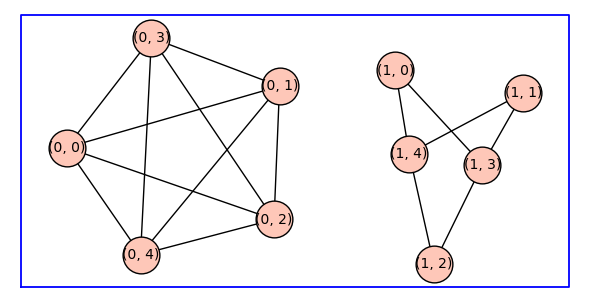

In [61]:
U.plot(graph_border=True,vertex_size=700,layout="spring")

<p>komponente povezanosti</p>

In [62]:
U.connected_components()

[[(0, 0), (0, 1), (0, 2), (0, 3), (0, 4)],
 [(1, 0), (1, 1), (1, 2), (1, 3), (1, 4)]]

<p>komponenta povezanosti koja sadrži vrh (1,1)</p>

In [63]:
U.connected_component_containing_vertex((1,1))

[(1, 0), (1, 1), (1, 2), (1, 3), (1, 4)]

<p>komponente povezanosti kao podgrafovi</p>

In [64]:
komp=U.connected_components_subgraphs()
komp

[Subgraph of (Complete graph disjoint_union Complete bipartite graph of order 3+2): Graph on 5 vertices,
 Subgraph of (Complete graph disjoint_union Complete bipartite graph of order 3+2): Graph on 5 vertices]

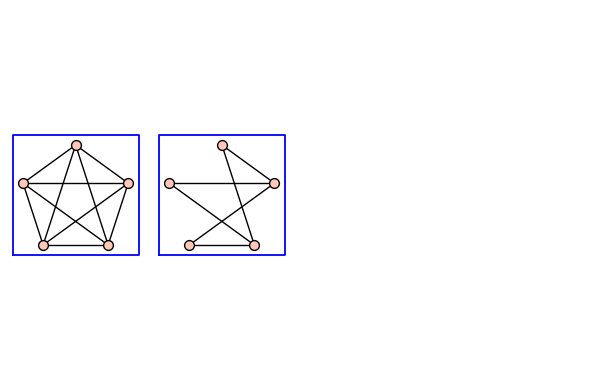

In [65]:
graphs_list.show_graphs(komp)

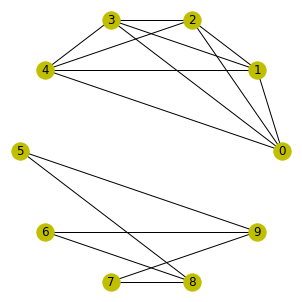

In [66]:
figure(figsize=(4,4))
nx.draw_circular(Unx,with_labels=True,node_color='y')

<p>komponente povezanosti</p>

In [67]:
list(nx.connected_components(Unx))

[{0, 1, 2, 3, 4}, {5, 6, 7, 8, 9}]

<p>komponente povezanosti kao podgrafovi</p>

In [68]:
komp_Unx=[]
for c in nx.connected_components(Unx):
    komp_Unx.append(Unx.subgraph(c).copy())

In [69]:
komp_Unx

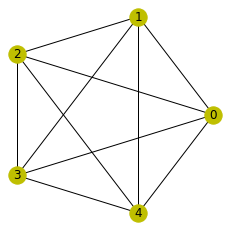

In [70]:
figure(figsize=(3,3))
nx.draw_circular(komp_Unx[0],with_labels=True,node_color='y')

In [71]:
figure(figsize=(3,3))
nx.draw_circular(komp_Unx[1],with_labels=True,node_color='y')

<h4>Da li je graf jednostavan</h4>

In [72]:
def is_simple(G):
    if type(G)==sage.graphs.graph.Graph:
        if G.number_of_loops()>0:
             return False
        if len(set(G.edges(labels=False)))!=G.num_edges():
            return False
        else:
            return True
    else:
        if nx.number_of_selfloops(G)>0:
             return False
        if len(set(G.edges()))!=G.number_of_edges():
            return False
        else:
            return True

In [73]:
is_simple(G1),is_simple(G2),is_simple(G3)

(True, False, True)

In [74]:
is_simple(G1nx),is_simple(G2nx),is_simple(G3nx)

(True, False, True)

<h4>Da li je graf potpun</h4>

In [75]:
def is_complete(G):
    if type(G)==sage.graphs.graph.Graph:
        if G.number_of_loops()>0: 
            return False
        if len(set(G.edges(labels=False)))!=G.num_edges(): 
            return False
        if G.num_edges()!=(G.num_verts()^2-G.num_verts())/2:
            return False
        else:
            return True
    else:
        if nx.number_of_selfloops(G)>0: 
            return False
        if len(set(G.edges()))!=G.number_of_edges(): 
            return False
        if G.number_of_edges()!=(G.number_of_nodes()^2-G.number_of_nodes())/2:
            return False
        else:
            return True

In [76]:
is_complete(G1),is_complete(G2),is_complete(G3)

(False, False, False)

In [77]:
is_complete(G1nx),is_complete(G2nx),is_complete(G3nx)

(False, False, False)

In [78]:
is_complete(graphs.CompleteGraph(8))

True

In [79]:
is_complete(nx.complete_graph(8))

True

<h4>Da li je graf regularan</h4>

In [80]:
G1.is_regular(),G2.is_regular(),G3.is_regular()

(False, False, False)

In [81]:
def regularan(Gnx):
    if len(set(dict(Gnx.degree()).values()))==1:
        return (True,list(dict(Gnx.degree()).values())[0])
    else:
        return False

In [82]:
regularan(G1nx),regularan(G2nx),regularan(G3nx)

(False, False, False)

In [83]:
graphs.PetersenGraph().is_regular()

True

In [84]:
regularan(nx.petersen_graph())

(True, 3)

In [85]:
graphs.CompleteGraph(8).is_regular()

True

In [86]:
regularan(nx.complete_graph(8))

(True, 7)

<h4>Da li je graf aciklički, tj. da li nema ciklusa</h4>

In [87]:
def is_acyclic(G):
    if type(G)==sage.graphs.graph.Graph:
        if G.num_edges()==G.num_verts()-G.connected_components_number():
            return True
        else:
            return False
    else:
        if G.number_of_edges()==G.number_of_nodes()-nx.number_connected_components(G):
            return True
        else:
            return False

In [88]:
is_acyclic(G1),is_acyclic(G2),is_acyclic(G3)

(False, False, False)

In [89]:
is_acyclic(G1nx),is_acyclic(G2nx),is_acyclic(G3nx)

(False, False, False)

In [90]:
is_acyclic(graphs.PathGraph(8))

True

In [91]:
is_acyclic(nx.path_graph(8))

True

<h4>Da li je graf stablo</h4>

In [92]:
G1.is_tree(),G2.is_tree(),G3.is_tree()

(False, False, False)

In [93]:
graphs.PathGraph(8).is_tree()

True

In [94]:
def TreeQ(G):
    if nx.number_connected_components(G)==1 and G.number_of_edges()==G.number_of_nodes()-1:
        return True
    else:
        return False

In [95]:
TreeQ(G1nx),TreeQ(G2nx),TreeQ(G3nx)

(False, False, False)

In [96]:
TreeQ(nx.path_graph(8))

True

<h4>Da li je graf ravninski</h4>

In [97]:
G1.is_planar(),G2.is_planar(),G3.is_planar()

(True, True, True)

In [98]:
graphs.CompleteGraph(5).is_planar()

False

In [99]:
graphs.CompleteBipartiteGraph(3,3).is_planar()

False

<h4>Da li je graf Eulerov</h4>

In [100]:
G1.is_eulerian(),G2.is_eulerian(),G3.is_eulerian()

(False, False, True)

In [101]:
G1e=Graph(G1,multiedges=True)
G1e.add_edge((1,2))

In [102]:
G1e.plot(pos={1:[0,2],2:[0,0],3:[2,2],4:[1,1],5:[2,0],6:[3,1]},graph_border=True,figsize=[5,4])

In [103]:
G1e.is_eulerian()

True

In [104]:
def EulerianQ(Gnx):
    if sum(map(lambda x: x%2,dict(Gnx.degree()).values()))==0 and nx.number_connected_components(Gnx)==1:
        return True
    else:
        return False

In [105]:
EulerianQ(G1nx),EulerianQ(G2nx),EulerianQ(G3nx)

(False, False, False)

In [106]:
EulerianQ(G1e.networkx_graph())

False

<h4>Da li je graf Hamiltonov</h4>

In [107]:
G1.is_hamiltonian(),G3.is_hamiltonian()

(True, False)

In [108]:
G2.is_hamiltonian()

False

<h4>Susjedni vrhovi nekog vrha u grafu</h4>

In [109]:
G1.neighbors(2)

[1, 4, 5]

In [110]:
G1[2]

[1, 4, 5]

In [111]:
[v for v in G1.neighbor_iterator(2)]

[1, 4, 5]

In [112]:
list(G1nx.neighbors(2))

[1, 4, 5]

In [113]:
G1nx[2]

AtlasView({1: {}, 4: {}, 5: {}})

In [114]:
[v for v in G1nx.neighbors(2)]

[1, 4, 5]

<h4>Udaljenost dva vrha u grafu</h4>

In [115]:
G2.distance(3,1)

1

In [116]:
G2.distance(2,5)

3

In [117]:
G2.shortest_path_length(2,5)

3

In [118]:
nx.shortest_path_length(G2nx,3,1)

1

In [119]:
nx.shortest_path_length(G2nx,2,5)

3

<h4>Najkraći put između dva vrha u grafu</h4>

In [120]:
G2.shortest_path(3,1)

[3, 1]

In [121]:
G2.shortest_path(2,5)

[2, 3, 4, 5]

In [122]:
G3.shortest_path(1,7)

[1, 2, 7]

In [123]:
nx.shortest_path(G2nx,3,1)

[3, 1]

In [124]:
nx.shortest_path(G2nx,2,5)

[2, 3, 4, 5]

In [125]:
nx.shortest_path(G3nx,1,7)

[1, 2, 7]

<h4>Udaljenost od zadanog vrha prema svim preostalim vrhovima u grafu</h4>

In [126]:
G2.shortest_path_lengths(2)

{2: 0, 3: 1, 1: 1, 4: 2, 5: 3, 6: 4}

In [127]:
G2.shortest_path_lengths(4)

{4: 0, 5: 1, 3: 1, 2: 2, 1: 2, 6: 2}

In [128]:
G3.shortest_path_lengths(1)

{1: 0, 6: 1, 2: 1, 8: 2, 7: 2, 3: 2, 5: 2, 4: 3}

In [129]:
nx.shortest_path_length(G2nx,2)

{2: 0, 1: 1, 3: 1, 4: 2, 5: 3, 6: 4}

In [130]:
nx.shortest_path_length(G2nx,4)

{4: 0, 3: 1, 5: 1, 1: 2, 2: 2, 6: 2}

In [131]:
nx.shortest_path_length(G3nx,1)

{1: 0, 2: 1, 6: 1, 3: 2, 5: 2, 7: 2, 8: 2, 4: 3}

<h4>Najkraći putovi od zadanog vrha prema svim preostalim vrhovima u grafu</h4>

In [132]:
G2.shortest_paths(2)

{2: [2],
 3: [2, 3],
 1: [2, 1],
 4: [2, 3, 4],
 5: [2, 3, 4, 5],
 6: [2, 3, 4, 5, 6]}

In [133]:
G2.shortest_paths(4)

{4: [4], 5: [4, 5], 3: [4, 3], 2: [4, 3, 2], 1: [4, 3, 1], 6: [4, 5, 6]}

In [134]:
G3.shortest_paths(1)

{1: [1],
 6: [1, 6],
 2: [1, 2],
 8: [1, 2, 8],
 7: [1, 2, 7],
 3: [1, 2, 3],
 5: [1, 6, 5],
 4: [1, 6, 5, 4]}

In [135]:
nx.shortest_path(G2nx,2)

{2: [2],
 1: [2, 1],
 3: [2, 3],
 4: [2, 3, 4],
 5: [2, 3, 4, 5],
 6: [2, 3, 4, 5, 6]}

In [136]:
nx.shortest_path(G2nx,4)

{4: [4], 3: [4, 3], 5: [4, 5], 1: [4, 3, 1], 2: [4, 3, 2], 6: [4, 5, 6]}

In [137]:
nx.shortest_path(G3nx,1)

{1: [1],
 2: [1, 2],
 6: [1, 6],
 3: [1, 2, 3],
 7: [1, 2, 7],
 8: [1, 2, 8],
 5: [1, 6, 5],
 4: [1, 2, 3, 4]}

In [138]:
nx.single_source_shortest_path(G2nx,4)

{4: [4], 3: [4, 3], 5: [4, 5], 1: [4, 3, 1], 2: [4, 3, 2], 6: [4, 5, 6]}

<h4>Najkraće udaljenosti između svaka dva vrha u grafu</h4>

In [139]:
G1.distance_all_pairs()

{1: {1: 0, 2: 1, 3: 1, 4: 1, 5: 2, 6: 2},
 2: {1: 1, 2: 0, 3: 2, 4: 1, 5: 1, 6: 2},
 3: {1: 1, 2: 2, 3: 0, 4: 1, 5: 1, 6: 1},
 4: {1: 1, 2: 1, 3: 1, 4: 0, 5: 1, 6: 2},
 5: {1: 2, 2: 1, 3: 1, 4: 1, 5: 0, 6: 1},
 6: {1: 2, 2: 2, 3: 1, 4: 2, 5: 1, 6: 0}}

In [140]:
G2.distance_all_pairs()

{1: {1: 0, 2: 1, 3: 1, 4: 2, 5: 3, 6: 4},
 2: {1: 1, 2: 0, 3: 1, 4: 2, 5: 3, 6: 4},
 3: {1: 1, 2: 1, 3: 0, 4: 1, 5: 2, 6: 3},
 4: {1: 2, 2: 2, 3: 1, 4: 0, 5: 1, 6: 2},
 5: {1: 3, 2: 3, 3: 2, 4: 1, 5: 0, 6: 1},
 6: {1: 4, 2: 4, 3: 3, 4: 2, 5: 1, 6: 0}}

In [141]:
G3.distance_all_pairs()

{1: {1: 0, 2: 1, 3: 2, 4: 3, 5: 2, 6: 1, 7: 2, 8: 2},
 2: {1: 1, 2: 0, 3: 1, 4: 2, 5: 2, 6: 2, 7: 1, 8: 1},
 3: {1: 2, 2: 1, 3: 0, 4: 1, 5: 2, 6: 3, 7: 2, 8: 2},
 4: {1: 3, 2: 2, 3: 1, 4: 0, 5: 1, 6: 2, 7: 2, 8: 2},
 5: {1: 2, 2: 2, 3: 2, 4: 1, 5: 0, 6: 1, 7: 1, 8: 1},
 6: {1: 1, 2: 2, 3: 3, 4: 2, 5: 1, 6: 0, 7: 2, 8: 2},
 7: {1: 2, 2: 1, 3: 2, 4: 2, 5: 1, 6: 2, 7: 0, 8: 2},
 8: {1: 2, 2: 1, 3: 2, 4: 2, 5: 1, 6: 2, 7: 2, 8: 0}}

In [142]:
dict(nx.shortest_path_length(G1nx))

{1: {1: 0, 2: 1, 3: 1, 4: 1, 5: 2, 6: 2},
 2: {2: 0, 1: 1, 4: 1, 5: 1, 3: 2, 6: 2},
 3: {3: 0, 1: 1, 4: 1, 5: 1, 6: 1, 2: 2},
 4: {4: 0, 1: 1, 2: 1, 3: 1, 5: 1, 6: 2},
 5: {5: 0, 2: 1, 3: 1, 4: 1, 6: 1, 1: 2},
 6: {6: 0, 3: 1, 5: 1, 1: 2, 2: 2, 4: 2}}

In [143]:
dict(nx.shortest_path_length(G2nx))

{1: {1: 0, 2: 1, 3: 1, 4: 2, 5: 3, 6: 4},
 2: {2: 0, 1: 1, 3: 1, 4: 2, 5: 3, 6: 4},
 3: {3: 0, 1: 1, 2: 1, 4: 1, 5: 2, 6: 3},
 4: {4: 0, 3: 1, 5: 1, 1: 2, 2: 2, 6: 2},
 5: {5: 0, 4: 1, 6: 1, 3: 2, 1: 3, 2: 3},
 6: {6: 0, 5: 1, 4: 2, 3: 3, 1: 4, 2: 4}}

In [144]:
dict(nx.shortest_path_length(G3nx))

{1: {1: 0, 2: 1, 6: 1, 3: 2, 5: 2, 7: 2, 8: 2, 4: 3},
 2: {2: 0, 8: 1, 1: 1, 3: 1, 7: 1, 4: 2, 5: 2, 6: 2},
 6: {6: 0, 1: 1, 5: 1, 2: 2, 4: 2, 7: 2, 8: 2, 3: 3},
 3: {3: 0, 2: 1, 4: 1, 1: 2, 5: 2, 7: 2, 8: 2, 6: 3},
 7: {7: 0, 2: 1, 5: 1, 1: 2, 3: 2, 4: 2, 6: 2, 8: 2},
 8: {8: 0, 2: 1, 5: 1, 1: 2, 3: 2, 4: 2, 6: 2, 7: 2},
 4: {4: 0, 3: 1, 5: 1, 2: 2, 6: 2, 7: 2, 8: 2, 1: 3},
 5: {5: 0, 8: 1, 4: 1, 6: 1, 7: 1, 1: 2, 2: 2, 3: 2}}

<h4>Najkraći putovi između svaka dva vrha u grafu</h4>

In [145]:
G1.shortest_path_all_pairs()

({1: {1: 0, 2: 1, 3: 1, 4: 1, 5: 2, 6: 2},
  2: {1: 1, 2: 0, 3: 2, 4: 1, 5: 1, 6: 2},
  3: {1: 1, 2: 2, 3: 0, 4: 1, 5: 1, 6: 1},
  4: {1: 1, 2: 1, 3: 1, 4: 0, 5: 1, 6: 2},
  5: {1: 2, 2: 1, 3: 1, 4: 1, 5: 0, 6: 1},
  6: {1: 2, 2: 2, 3: 1, 4: 2, 5: 1, 6: 0}},
 {1: {1: None, 2: 1, 3: 1, 4: 1, 5: 2, 6: 3},
  2: {1: 2, 2: None, 3: 1, 4: 2, 5: 2, 6: 5},
  3: {1: 3, 2: 1, 3: None, 4: 3, 5: 3, 6: 3},
  4: {1: 4, 2: 4, 3: 4, 4: None, 5: 4, 6: 3},
  5: {1: 2, 2: 5, 3: 5, 4: 5, 5: None, 6: 5},
  6: {1: 3, 2: 5, 3: 6, 4: 3, 5: 6, 6: None}})

<p>udaljenosti</p>

In [146]:
G1.shortest_path_all_pairs()[0]

{1: {1: 0, 2: 1, 3: 1, 4: 1, 5: 2, 6: 2},
 2: {1: 1, 2: 0, 3: 2, 4: 1, 5: 1, 6: 2},
 3: {1: 1, 2: 2, 3: 0, 4: 1, 5: 1, 6: 1},
 4: {1: 1, 2: 1, 3: 1, 4: 0, 5: 1, 6: 2},
 5: {1: 2, 2: 1, 3: 1, 4: 1, 5: 0, 6: 1},
 6: {1: 2, 2: 2, 3: 1, 4: 2, 5: 1, 6: 0}}

<p>prethodnici pojedinog vrha na najkraćem putu između dva vrha</p>

In [147]:
G1.shortest_path_all_pairs()[1]

{1: {1: None, 2: 1, 3: 1, 4: 1, 5: 2, 6: 3},
 2: {1: 2, 2: None, 3: 1, 4: 2, 5: 2, 6: 5},
 3: {1: 3, 2: 1, 3: None, 4: 3, 5: 3, 6: 3},
 4: {1: 4, 2: 4, 3: 4, 4: None, 5: 4, 6: 3},
 5: {1: 2, 2: 5, 3: 5, 4: 5, 5: None, 6: 5},
 6: {1: 3, 2: 5, 3: 6, 4: 3, 5: 6, 6: None}}

In [148]:
nx.shortest_path(G1nx)

{1: {1: [1], 2: [1, 2], 3: [1, 3], 4: [1, 4], 5: [1, 2, 5], 6: [1, 3, 6]},
 2: {2: [2], 1: [2, 1], 4: [2, 4], 5: [2, 5], 3: [2, 1, 3], 6: [2, 5, 6]},
 3: {3: [3], 1: [3, 1], 4: [3, 4], 5: [3, 5], 6: [3, 6], 2: [3, 1, 2]},
 4: {4: [4], 1: [4, 1], 2: [4, 2], 3: [4, 3], 5: [4, 5], 6: [4, 3, 6]},
 5: {5: [5], 2: [5, 2], 3: [5, 3], 4: [5, 4], 6: [5, 6], 1: [5, 2, 1]},
 6: {6: [6], 3: [6, 3], 5: [6, 5], 1: [6, 3, 1], 4: [6, 3, 4], 2: [6, 5, 2]}}

In [149]:
G2.shortest_path_all_pairs()[1]

{1: {1: None, 2: 1, 3: 1, 4: 3, 5: 4, 6: 5},
 2: {1: 2, 2: None, 3: 2, 4: 3, 5: 4, 6: 5},
 3: {1: 3, 2: 3, 3: None, 4: 3, 5: 4, 6: 5},
 4: {1: 3, 2: 3, 3: 4, 4: None, 5: 4, 6: 5},
 5: {1: 3, 2: 3, 3: 4, 4: 5, 5: None, 6: 5},
 6: {1: 3, 2: 3, 3: 4, 4: 5, 5: 6, 6: None}}

In [150]:
nx.shortest_path(G2nx)

{1: {1: [1],
  2: [1, 2],
  3: [1, 3],
  4: [1, 3, 4],
  5: [1, 3, 4, 5],
  6: [1, 3, 4, 5, 6]},
 2: {2: [2],
  1: [2, 1],
  3: [2, 3],
  4: [2, 3, 4],
  5: [2, 3, 4, 5],
  6: [2, 3, 4, 5, 6]},
 3: {3: [3], 1: [3, 1], 2: [3, 2], 4: [3, 4], 5: [3, 4, 5], 6: [3, 4, 5, 6]},
 4: {4: [4], 3: [4, 3], 5: [4, 5], 1: [4, 3, 1], 2: [4, 3, 2], 6: [4, 5, 6]},
 5: {5: [5],
  4: [5, 4],
  6: [5, 6],
  3: [5, 4, 3],
  1: [5, 4, 3, 1],
  2: [5, 4, 3, 2]},
 6: {6: [6],
  5: [6, 5],
  4: [6, 5, 4],
  3: [6, 5, 4, 3],
  1: [6, 5, 4, 3, 1],
  2: [6, 5, 4, 3, 2]}}

In [151]:
G3.shortest_path_all_pairs()[1]

{1: {1: None, 2: 1, 3: 2, 4: 3, 5: 6, 6: 1, 7: 2, 8: 2},
 2: {1: 2, 2: None, 3: 2, 4: 3, 5: 7, 6: 1, 7: 2, 8: 2},
 3: {1: 2, 2: 3, 3: None, 4: 3, 5: 4, 6: 1, 7: 2, 8: 2},
 4: {1: 2, 2: 3, 3: 4, 4: None, 5: 4, 6: 5, 7: 5, 8: 5},
 5: {1: 6, 2: 7, 3: 4, 4: 5, 5: None, 6: 5, 7: 5, 8: 5},
 6: {1: 6, 2: 1, 3: 2, 4: 5, 5: 6, 6: None, 7: 5, 8: 5},
 7: {1: 2, 2: 7, 3: 2, 4: 5, 5: 7, 6: 5, 7: None, 8: 2},
 8: {1: 2, 2: 8, 3: 2, 4: 5, 5: 8, 6: 5, 7: 2, 8: None}}

In [152]:
nx.shortest_path(G3nx)

{1: {1: [1],
  2: [1, 2],
  6: [1, 6],
  3: [1, 2, 3],
  7: [1, 2, 7],
  8: [1, 2, 8],
  5: [1, 6, 5],
  4: [1, 2, 3, 4]},
 2: {2: [2],
  1: [2, 1],
  3: [2, 3],
  7: [2, 7],
  8: [2, 8],
  6: [2, 1, 6],
  4: [2, 3, 4],
  5: [2, 7, 5]},
 6: {6: [6],
  1: [6, 1],
  5: [6, 5],
  2: [6, 1, 2],
  4: [6, 5, 4],
  7: [6, 5, 7],
  8: [6, 5, 8],
  3: [6, 1, 2, 3]},
 3: {3: [3],
  2: [3, 2],
  4: [3, 4],
  1: [3, 2, 1],
  7: [3, 2, 7],
  8: [3, 2, 8],
  5: [3, 4, 5],
  6: [3, 2, 1, 6]},
 7: {7: [7],
  2: [7, 2],
  5: [7, 5],
  1: [7, 2, 1],
  3: [7, 2, 3],
  8: [7, 2, 8],
  4: [7, 5, 4],
  6: [7, 5, 6]},
 8: {8: [8],
  2: [8, 2],
  5: [8, 5],
  1: [8, 2, 1],
  3: [8, 2, 3],
  7: [8, 2, 7],
  4: [8, 5, 4],
  6: [8, 5, 6]},
 4: {4: [4],
  3: [4, 3],
  5: [4, 5],
  2: [4, 3, 2],
  6: [4, 5, 6],
  7: [4, 5, 7],
  8: [4, 5, 8],
  1: [4, 3, 2, 1]},
 5: {5: [5],
  4: [5, 4],
  6: [5, 6],
  7: [5, 7],
  8: [5, 8],
  3: [5, 4, 3],
  1: [5, 6, 1],
  2: [5, 7, 2]}}

<h4>Ekscentricitet vrha - maksimalna udaljenost vrha od svih preostalih vrhova u grafu</h4>

In [153]:
G1.eccentricity()

[2, 2, 2, 2, 2, 2]

In [154]:
G1.eccentricity(with_labels=True)

{1: 2, 2: 2, 3: 2, 4: 2, 5: 2, 6: 2}

In [155]:
G1.eccentricity([2,3,6],with_labels=True)

{2: 2, 3: 2, 6: 2}

In [156]:
G1.eccentricity(5)

2

In [157]:
G2.eccentricity()

[4, 4, 3, 2, 3, 4]

In [158]:
G2.eccentricity(with_labels=True)

{1: 4, 2: 4, 3: 3, 4: 2, 5: 3, 6: 4}

In [159]:
G3.eccentricity()

[3, 2, 3, 3, 2, 3, 2, 2]

In [160]:
G3.eccentricity(with_labels=True)

{1: 3, 2: 2, 3: 3, 4: 3, 5: 2, 6: 3, 7: 2, 8: 2}

In [161]:
nx.eccentricity(G1nx)

{1: 2, 2: 2, 3: 2, 4: 2, 5: 2, 6: 2}

In [162]:
nx.eccentricity(G2nx)

{1: 4, 2: 4, 3: 3, 4: 2, 5: 3, 6: 4}

In [163]:
nx.eccentricity(G2nx,4)

2

In [164]:
nx.eccentricity(G3nx)

{1: 3, 2: 2, 6: 3, 3: 3, 7: 2, 8: 2, 4: 3, 5: 2}

<h4>Radijus grafa - minimalni ekscentricitet</h4>

In [165]:
G1.radius()

2

In [166]:
G2.radius()

2

In [167]:
G3.radius()

2

In [168]:
nx.radius(G1nx)

2

In [169]:
nx.radius(G2nx)

2

In [170]:
nx.radius(G3nx)

2

<h4>Dijametar grafa - maksimalni ekscentricitet</h4>

In [171]:
G1.diameter()

2

In [172]:
G2.diameter()

4

In [173]:
G3.diameter()

3

In [174]:
nx.diameter(G1nx)

2

In [175]:
nx.diameter(G2nx)

4

In [176]:
nx.diameter(G3nx)

3

<h4>Struk grafa</h4>

In [177]:
G1.girth()

3

In [178]:
G2.girth()

2

In [179]:
G3.girth()

4

<h4>Rezni bridovi grafa</h4>

In [180]:
list(G1.bridges())

[]

In [181]:
list(G2.bridges())

[(5, 6, None), (3, 4, None)]

In [182]:
list(G3.bridges())

[]

<h4>Koliko najmanje bridova treba ukloniti iz grafa da on postane nepovezan</h4>

In [183]:
G1.edge_connectivity()

2

In [184]:
G1.edge_connectivity(value_only=False)

[2, [(6, 3), (6, 5)]]

In [185]:
G1.edge_connectivity(value_only=False,vertices=True)

[2, [(6, 3), (6, 5)], [[1, 2, 3, 4, 5], [6]]]

In [186]:
G2.allow_multiple_edges(False)
G2.edge_connectivity(value_only=False,implementation="boost")

[1, [(6, 5)]]

In [187]:
G3.edge_connectivity(value_only=False)

[2, [(1, 2), (1, 6)]]

<h4 style="line-height:25px;">Koliko najmanje bridova treba ukoniti između dva vrha da graf postane nepovezan, a ta dva vrha da pripadaju različitim komponentama povezanosti</h4>

In [188]:
G1.edge_cut(1,3,value_only=False,vertices=True)

[3, [(1, 2, None), (1, 3, None), (1, 4, None)], [[1], [2, 3, 4, 5, 6]]]

In [189]:
G2.edge_cut(2,3,value_only=False,vertices=True)

[2, [(1, 2, None), (2, 3, None)], [[2], [1, 3, 4, 5, 6]]]

In [190]:
G2.edge_cut(1,2,value_only=False)

[2, [(1, 2, None), (1, 3, None)]]

In [191]:
G3.edge_cut(1,5,value_only=False,vertices=True)

[2, [(1, 2, None), (1, 6, None)], [[1], [2, 3, 4, 5, 6, 7, 8]]]

<h4>Rezni vrhovi grafa</h4>

In [192]:
G1.blocks_and_cut_vertices()[1]

[]

In [193]:
G2.blocks_and_cut_vertices()[1]

[3, 4, 5]

In [194]:
G3.blocks_and_cut_vertices()[1]

[]

<h4>Bikomponente ili blokovi u grafu - maksimalni inducirani podgrafovi koji nemaju reznih vrhova</h4>

In [195]:
G1.blocks_and_cut_vertices()[0]

[[1, 2, 3, 4, 5, 6]]

In [196]:
G2.blocks_and_cut_vertices()[0]

[[5, 6], [4, 5], [3, 4], [1, 2, 3]]

In [197]:
G3.blocks_and_cut_vertices()[0]

[[1, 2, 6, 3, 7, 8, 4, 5]]

<h4>Koliko najmanje vrhova treba ukloniti iz grafa da on postane nepovezan</h4>

In [198]:
G1.vertex_connectivity()

2

In [199]:
G1.vertex_connectivity(value_only=False)

(2, [3, 5])

In [200]:
G1.vertex_connectivity(value_only=False,sets=True)

(2, [3, 5], [[1, 2, 4], [6]])

In [201]:
G2.vertex_connectivity()

1

In [202]:
G2.vertex_connectivity(value_only=False,sets=True)

(1, [5], [[6], [1, 2, 3, 4]])

In [203]:
G3.vertex_connectivity(value_only=False,sets=True)

(2, [2, 5], [[8], [1, 3, 4, 6, 7]])

<h4 style="line-height:25px;">Koliko  najmanje vrhova treba ukoniti između dva vrha da graf postane  nepovezan, a ta dva vrha da pripadaju različitim komponentama  povezanosti</h4>

In [204]:
G1.vertex_cut(1,4)

EmptySetError: there can be no vertex cut between adjacent vertices

In [205]:
G1.vertex_cut(1,5)

3

In [206]:
G1.vertex_cut(1,5,value_only=False,vertices=True)

(3, [2, 3, 4], [[1], [5, 6]])

In [207]:
G2.vertex_cut(2,4,value_only=False,vertices=True)

(1, [3], [[1, 2], [4, 5, 6]])

In [208]:
G3.vertex_cut(1,3,value_only=False,vertices=True)

(2, [2, 4], [[1, 5, 6, 7, 8], [3]])

<h4>Hamiltonov ciklus</h4>

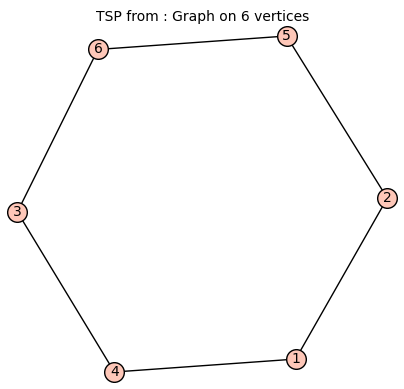

In [209]:
G1.hamiltonian_cycle()

In [210]:
G1.hamiltonian_cycle().show()

<p>želimo li istaknuti Hamiltonov ciklus na zadanom grafu, možemo definirati svoju funkciju koja će to raditi</p>

In [211]:
def hamiltonov_ciklus(G,pozicije_vrhova=None,laj="spring",boja="red"):
    if not(G.is_hamiltonian()):
        return "Error: Graf nije Hamiltonov"
    bridovi=G.hamiltonian_cycle().edges(labels=False)
    if pozicije_vrhova==None:
        slika=G.plot(graph_border=True,edge_colors={boja:bridovi},layout=laj)
    else:
        slika=G.plot(graph_border=True,edge_colors={boja:bridovi},pos=pozicije_vrhova)
    return slika

In [212]:
hamiltonov_ciklus(G1,pozicije_vrhova={1:[0,2],2:[0,0],3:[2,2],4:[1,1],5:[2,0],6:[3,1]}).show(figsize=[5,4])

In [213]:
G2.hamiltonian_cycle()

EmptySetError: the given graph is not Hamiltonian

In [214]:
hamiltonov_ciklus(G2)

'Error: Graf nije Hamiltonov'

In [215]:
hamiltonov_ciklus(G3)

'Error: Graf nije Hamiltonov'

<h4>Eulerova tura</h4>

In [216]:
G3.eulerian_circuit(labels=False)

[(1, 6),
 (6, 5),
 (5, 8),
 (8, 2),
 (2, 7),
 (7, 5),
 (5, 4),
 (4, 3),
 (3, 2),
 (2, 1)]

In [217]:
G3.eulerian_circuit(labels=False,return_vertices=True)

([(1, 6),
  (6, 5),
  (5, 8),
  (8, 2),
  (2, 7),
  (7, 5),
  (5, 4),
  (4, 3),
  (3, 2),
  (2, 1)],
 [1, 6, 5, 8, 2, 7, 5, 4, 3, 2, 1])

In [218]:
G3.eulerian_circuit(labels=False,return_vertices=True)[1]

[1, 6, 5, 8, 2, 7, 5, 4, 3, 2, 1]

<p><strong>Animacija Eulerove ture</strong></p>

In [219]:
bridovi=G3.eulerian_circuit(labels=False)
animacija=animate([G3.plot(pos={1:[0,2],2:[1,2],3:[2,2],4:[2,0],5:[1,0],6:[0,0],7:[-1,1],8:[3,1]},
                           graph_border=True,edge_colors={"red":bridovi[0:k]}) for k in srange(0,len(bridovi)+1,1)])
show(animacija.show(delay=150,iterations=0))

Animation with 11 frames

<p><strong>Interakcija korak po korak Eulerove ture</strong></p>

In [220]:
bridovi=G3.eulerian_circuit(labels=False)
d=len(bridovi)
@interact
def _(tura=selector([0..d],nrows=1)):
    G3.plot(pos={1:[0,2],2:[1,2],3:[2,2],4:[2,0],5:[1,0],6:[0,0],7:[-1,1],8:[3,1]},
            graph_border=True,edge_colors={"red":bridovi[0:tura]}).show(figsize=[5,4])

Interactive function <function _ at 0x7f6b84bfcd30> with 1 widget
  tura: ToggleButtons(description='tura', op…

<h2>Nekoliko zadataka</h2>
<div style="background-color: #F5FFFA; border: 2px solid #B0C4DE; border-radius: 15px; padding:0px 10px 25px; overflow:auto">
<h3>1. zadatak</h3>
<p>U zadanom grafu pronađite</p>
<p>     <img src="gr41.png" alt="" width="235" height="232" /></p>
<ol style="line-height: 25px;list-style-type: lower-alpha;">
<li>Sve putove između vrhova $b$ i $d$.</li>
<li>Sve putove između vrhova $b$ i $c$.</li>
<li>Broj šetnji duljine $3$ između vrhova $b$ i $c$.</li>
<li>Ukupni broj svih šetnji duljine $3$.</li>
</ol>
</div>
<h3>Rješenje</h3>

In [221]:
graf1=Graph({'a':['a','b','d'],'b':['c','d','d'],'c':['d']})

<p><strong>a) dio</strong> - donja naredba daje sve putove na pripadnom jednostavnom grafu</p>

In [222]:
graf1.all_paths('b','d')

[['b', 'c', 'd'], ['b', 'a', 'd'], ['b', 'd']]

<p><span id="cell_outer_331"><strong>b) dio</strong> - donja naredba daje sve putove na pripadnom jednostavnom grafu</span></p>

In [223]:
graf1.all_paths('b','c')

[['b', 'c'], ['b', 'a', 'd', 'c'], ['b', 'd', 'c']]

<p><strong>c) dio</strong></p>

In [224]:
graf1.vertices()

['a', 'b', 'c', 'd']

In [225]:
mat1=graf1.adjacency_matrix();mat1

[1 1 0 1]
[1 0 1 2]
[0 1 0 1]
[1 2 1 0]

In [226]:
mat1^3

[ 9 11  6 11]
[11  9  8 17]
[ 6  8  4  8]
[11 17  8  9]

<p style="line-height:25px;">raspored vrhova u matrici susjedstva je onakav kakav je i u listi graf1.vertices() pa tražimo element na poziciji (1,2) (pazite: indeksiranje počinje s brojem nula)</p>

In [227]:
(mat1^3)[1,2]

8

In [228]:
(mat1^3)[graf1.vertices().index('b'),graf1.vertices().index('c')]

8

<p><strong>d) dio</strong></p>

In [229]:
sum(sum(mat1^3))

153

<div style="background-color: #F5FFFA; border: 2px solid #B0C4DE; border-radius: 15px; padding:0px 10px 25px; overflow:auto">
<h3>2. zadatak</h3>
<p>Zadana je matrica susjedstva $A=\begin{bmatrix}1&2&1&0\\ 2&0&1&0\\ 1&1&0&0\\ 0&0&0&0\end{bmatrix}$  grafa čiji su vrhovi redom $v_1,v_2,v_3,v_4$.</p>
<ol style="line-height: 25px;list-style-type:lower-alpha;">
<li>Ima li petlji u grafu? Da li je graf jednostavan?</li>
<li>Ima li izoliranih vrhova u grafu?</li>
<li>Izračunajte stupnjeve svih vrhova.</li>
<li>Nacrtajte graf.</li>
<li>Odredite broj šetnji duljine 2 i duljine 3 između vrhova $v_1$ i $v_2$, te vrhova $v_1$ i $v_4$.</li>
</ol>
</div>
<h3>Rješenje</h3>

In [230]:
graf2=Graph({'v1':['v1','v2','v2','v3'],'v2':['v3'],'v4':[]})

In [231]:
graf2.vertices(),graf2.edges(labels=False)

(['v1', 'v2', 'v3', 'v4'],
 [('v1', 'v1'), ('v1', 'v2'), ('v1', 'v2'), ('v1', 'v3'), ('v2', 'v3')])

<p><strong>a) dio</strong></p>

In [232]:
graf2.has_loops()

True

In [233]:
graf2.loop_edges()

[('v1', 'v1', None)]

In [234]:
is_simple(graf2)

False

In [235]:
graf2.multiple_edges(labels=False)

[('v1', 'v2'), ('v1', 'v2')]

<p><strong>b) dio </strong>-  vrh $v_4$ je izolirani vrh<strong><br /></strong></p>

In [236]:
for vrh in graf2.vertices():
    if graf2.degree(vrh)==0:
        print(vrh,)

v4


<p><strong>c) dio</strong></p>

In [237]:
graf2.degree(labels=True)

{'v4': 0, 'v2': 3, 'v3': 2, 'v1': 5}

<p><strong>d) dio</strong></p>

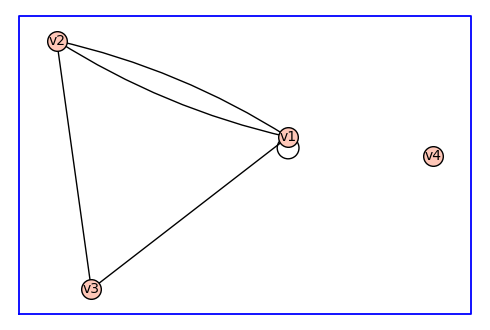

In [238]:
graf2.plot(graph_border=True,figsize=[5,4])

<p><strong>e) dio</strong></p>

In [239]:
mat2=graf2.adjacency_matrix();mat2

[1 2 1 0]
[2 0 1 0]
[1 1 0 0]
[0 0 0 0]

<p>broj $(v_1,v_2)$-šetnji duljine 2</p>

In [240]:
(mat2^2)[0,1]

3

<p>broj $(v_1,v_4)$-šetnji duljine 2</p>

In [241]:
(mat2^2)[0,3]

0

<p>broj $(v_1,v_2)$-šetnji duljine 3</p>

In [242]:
(mat2^3)[0,1]

15

<p>broj $(v_1,v_4)$-šetnji duljine 3</p>

In [243]:
(mat2^3)[0,3]

0

<div style="background-color: #F5FFFA; border: 2px solid #B0C4DE; border-radius: 15px; padding:0px 10px 25px; overflow:auto">
<h3>3. zadatak</h3>
<ol style="line-height: 25px;list-style-type:lower-alpha;">
<li>Da li je graf Hamiltonov?</li>
<li>Postoji li Hamiltonov put u grafu?</li>
<li>Da li je graf Eulerov?</li>
<li>Postoji li Eulerova staza u grafu</li>
</ol>
<p style="margin-left:50px;"><img src="gr42.png" alt="" width="180" height="235" align="left" /></p>
</div>
<h3>Rješenje</h3>

In [244]:
graf3=Graph({'A':['B','C','E'],'B':['C','D','E'],'C':['D','E']})

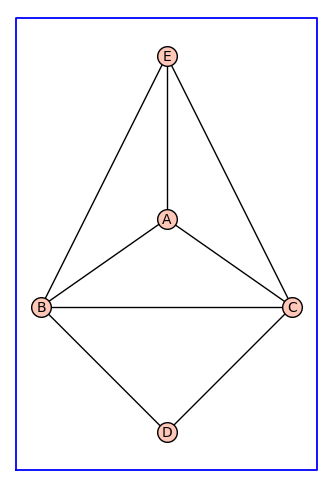

In [245]:
graf3.plot(graph_border=True,pos={'A':[0,0.7],'B':[-1,0],'C':[1,0],'D':[0,-1],'E':[0,2]},figsize=[4,5])

<p><strong>Zadani graf jest Hamiltonov</strong></p>

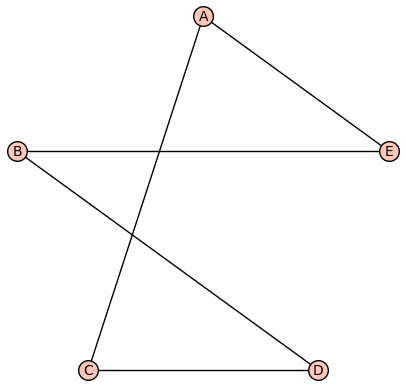

In [246]:
graf3.hamiltonian_cycle().plot(layout="circular",figsize=[5,4])

In [247]:
hamiltonov_ciklus(graf3,pozicije_vrhova={'A':[0,0.7],'B':[-1,0],'C':[1,0],'D':[0,-1],'E':[0,2]}).show(figsize=[4,5])

<p><strong>Zadani graf ima Hamiltonov put</strong></p>

<p>Funkcija <span style="color: #ff0000;"><strong>hamiltonov_put</strong></span> daje bridove nekog Hamiltonovog puta u grafu ukoliko on postoji.</p>

In [248]:
def hamiltonov_put(G):
    try:
        H=G.copy()
        H.add_edges(zip(G.vertices(),['vrh']*G.num_verts()))
        ciklus=H.hamiltonian_cycle()
        ciklus.delete_vertex('vrh')
        return ciklus.edges(labels=False)
    except ValueError:
        return "Error: Graf nema Hamiltonov put"

In [249]:
hamiltonov_put(graf3)

[('A', 'B'), ('B', 'D'), ('C', 'D'), ('C', 'E')]

<p>Funkcija <span style="color: #ff0000;"><strong>hamiltonov_put_graf</strong></span> ističe neki Hamiltonov put na zadanom grafu ukoliko on postoji.</p>

In [250]:
def hamiltonov_put_graf(G,pozicije_vrhova=None,laj="spring",boja="red"):
    try:
        H=G.copy()
        H.add_edges(zip(G.vertices(),['vrh']*G.num_verts()))
        ciklus=H.hamiltonian_cycle()
        ciklus.delete_vertex('vrh')
        bridovi=ciklus.edges(labels=False)
        if pozicije_vrhova==None:
            slika=G.plot(graph_border=True,edge_colors={boja:bridovi},layout=laj)
        else:
            slika=G.plot(graph_border=True,edge_colors={boja:bridovi},pos=pozicije_vrhova)
        return slika
    except ValueError:
        return "Error: Graf nema Hamiltonov put"

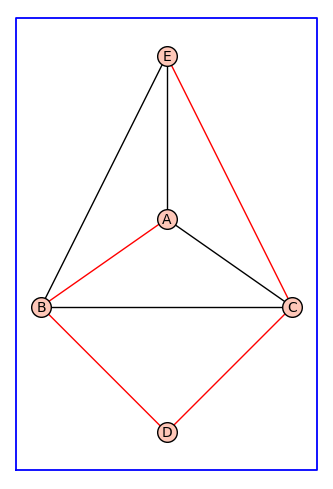

In [251]:
hamiltonov_put_graf(graf3,pozicije_vrhova={'A':[0,0.7],'B':[-1,0],'C':[1,0],'D':[0,-1],'E':[0,2]}).show(figsize=[4,5])

<p><strong>Zadani graf nije Eulerov, ali ima Eulerovu stazu zbog toga što je povezan i ima točno dva vrha neparnog stupnja<br /></strong></p>

In [252]:
graf3.is_eulerian()

False

In [253]:
graf3.degree()

[2, 4, 3, 4, 3]

In [254]:
def is_rezni(G,brid):
    graf=G.copy()
    graf.delete_edge(brid)
    if graf.connected_components_number()>G.connected_components_number():
            return True
    else:
        return False

In [255]:
def eulerova_staza(G,izlaz="vrhovi"):
    if G.is_eulerian():
        return "Graf G ima Eulerovu turu"
    neparni_vrhovi=list(filter(lambda vrh: is_odd(G.degree(vrh)), G.vertices()))
    if len(neparni_vrhovi)>2:
        return "Graf nema Eulerovu stazu"
    H=G.copy()
    staza=[neparni_vrhovi[0]]
    while H.num_edges()!=0:
        v=staza[-1]
        susjedi=H[v]
        if len(susjedi)==1:
            staza.append(susjedi[0])
            if (v,staza[-1]) in H.edges(labels=False):
                H.delete_edge((v,staza[-1]))
            else:
                H.delete_edge((staza[-1],v))
        else:
            for vrh in susjedi:
                if (v,vrh) in H.edges(labels=False):
                    brid=(v,vrh)
                else:
                    brid=(vrh,v)
                if not(is_rezni(H,brid)):
                    staza.append(vrh)
                    H.delete_edge(brid)
                    break
    if izlaz=="vrhovi":
        return staza
    elif izlaz=="bridovi":
        staza2=[]
        for k in range(len(staza)-1):
            if (staza[k],staza[k+1]) in G.edges(labels=False):
                staza2.append((staza[k],staza[k+1]))
            else:
                staza2.append((staza[k+1],staza[k]))
        return staza2

In [256]:
eulerova_staza(graf3)

['A', 'B', 'D', 'C', 'B', 'E', 'C', 'A', 'E']

In [257]:
eulerova_staza(graf3,izlaz="bridovi")

[('A', 'B'),
 ('B', 'D'),
 ('D', 'C'),
 ('C', 'B'),
 ('B', 'E'),
 ('E', 'C'),
 ('C', 'A'),
 ('A', 'E')]

In [258]:
bridovi2=eulerova_staza(graf3,izlaz="bridovi")
d2=len(bridovi2)
@interact
def _(staza=selector([0..d2],nrows=1)):
    graf3.plot(pos={'A':[0,0.7],'B':[-1,0],'C':[1,0],'D':[0,-1],'E':[0,2]},graph_border=True,
               edge_colors={"red":bridovi2[0:staza]}).show(figsize=[5,4])

Interactive function <function _ at 0x7f6b85c4e430> with 1 widget
  staza: ToggleButtons(description='staza', …

<div style="background-color: #F5FFFA; border: 2px solid #B0C4DE; border-radius: 15px; padding:0px 10px 25px; overflow:auto">
<h3>4. zadatak</h3>
<p>Može li skakač na šahovskoj ploči $n\times n,\ n\geqslant3$, krenuti iz nekog mjestai posjetiti svako polje točno jednom i vratiti se natrag na mjesto otkud je počeo? Skakač se kreće u obliku slova $L$, tj. <img src="L.png" alt="" width="34" height="20" style="display: inline-block;padding: 0px 2px 25px 5px;"/>.</p>
</div>
<h3>Rješenje</h3>

In [259]:
def konjic_skok(m,n):
    return Graph([list(map(lambda x:tuple(x), cartesian_product((range(1,m+1),range(1,n+1))).list())), 
                  lambda i,j: (abs(i[0]-j[0])==1 and abs(i[1]-j[1])==2) or (abs(i[0]-j[0])==2 and abs(i[1]-j[1])==1)])

In [260]:
def pozicije_konjic(m,n):
    pozicije={}
    for i in range(1,m+1):
        for j in range(1,n+1):
            pozicije[(i,j)]=(j,i)
    return pozicije

<p><strong>Na $3\times3$ ploči to nije moguće</strong></p>

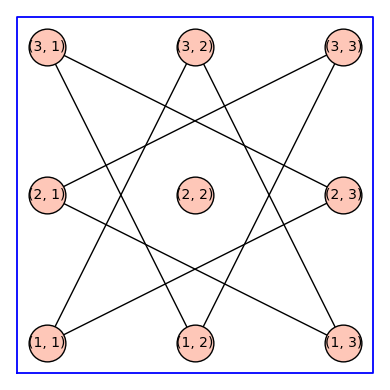

In [261]:
konjic_skok(3,3).plot(pos=pozicije_konjic(3,3),graph_border=True,vertex_size=700,figsize=[4,4])

In [262]:
konjic_skok(3,3).is_hamiltonian()

False

<p><strong>Na $8\times8$ ploči to je moguće</strong></p>

In [263]:
konjic_skok(8,8).is_hamiltonian()

True

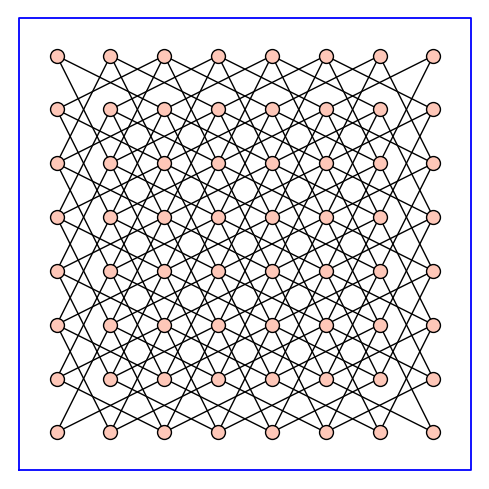

In [264]:
konjic_skok(8,8).plot(pos=pozicije_konjic(8,8),graph_border=True,vertex_labels=False,vertex_size=100,figsize=[5,5])

<p><strong>animacija konjićeve ture na $8\times8$ ploči</strong></p>

<p>Kako bi se lakše pratila animacija, uvodimo sljedeće bojanje polja:</p>
<ul>
<li>polja obojana žutom bojom su polja koja je konjić već posjetio.</li>
<li>polje obojano svijetloplavom bojom je polje na kojem je konjić bio u prethodnom koraku</li>
<li>polje obojano svijetlozelenom bojom je polje na kojem se konjić trenutno nalazi u tekućem koraku</li>
</ul>

In [265]:
def bojanje(korak):
    if korak==1:
        return {"yellow":[redoslijed_vrhova[0]]}
    if korak==2:
        return {"cyan":[redoslijed_vrhova[0]],"#00FF00":[redoslijed_vrhova[1]]}
    if korak>=3:
        return {"yellow":redoslijed_vrhova[0:korak-2],"cyan":[redoslijed_vrhova[korak-2]],"#00FF00":[redoslijed_vrhova[korak-1]]}

Animation with 64 frames
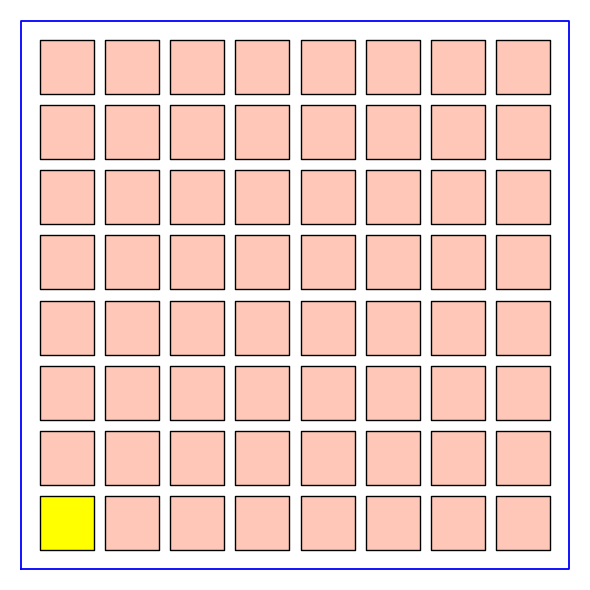

In [266]:
ploca88=konjic_skok(8,8).hamiltonian_cycle()
redoslijed_vrhova=[(1,1)]
while len(redoslijed_vrhova)<64:
    susjedi=ploca88.neighbors(redoslijed_vrhova[-1])
    if susjedi[1] in redoslijed_vrhova:
        redoslijed_vrhova.append(susjedi[0])
    else:
        redoslijed_vrhova.append(susjedi[1])
aa=animate([konjic_skok(8,8).plot(pos=pozicije_konjic(8,8),graph_border=True,vertex_labels=False,vertex_shape='s',
                                  vertex_size=1500,edge_colors={"white":konjic_skok(8,8).edges()},
                                  vertex_colors=bojanje(k)) for k in srange(1,65,1)],figsize=[6,6])
aa.show(delay=150,iterations=0)

<p><strong>Ili ako vam je draže interaktivno proučavati svaki korak</strong></p>

In [267]:
konjic88=konjic_skok(8,8)
ploca88=konjic_skok(8,8).hamiltonian_cycle()
redoslijed_vrhova=[(1,1)]
while len(redoslijed_vrhova)<64:
    susjedi=ploca88.neighbors(redoslijed_vrhova[-1])
    if susjedi[1] in redoslijed_vrhova:
        redoslijed_vrhova.append(susjedi[0])
    else:
        redoslijed_vrhova.append(susjedi[1])
d3=len(redoslijed_vrhova)
@interact
def _(korak=selector([1..d3],nrows=1)):
    konjic_skok(8,8).plot(pos=pozicije_konjic(8,8),graph_border=True,vertex_labels=False,vertex_shape='s',vertex_size=1500,
                          edge_colors={"white":konjic_skok(8,8).edges()},vertex_colors=bojanje(korak)).show(figsize=[7,6])

Interactive function <function _ at 0x7f6b7681c820> with 1 widget
  korak: ToggleButtons(description='korak', …